# Synthetic Data Demo

In [1]:
from impactchart.model import XGBoostImpactModel

from impactchartdemo.dataset import synth1

import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
N = 200

In [3]:
X, y = synth1.get_data(N)

In [4]:
X

,x_0,x_1,x_2,x_3,x_4
0,-41.066999,6.117351,-61.695843,-86.419928,57.397092
1,31.266704,27.504179,15.120579,-92.187417,-28.437279
2,89.136637,-87.991064,72.808421,75.458105,-89.761267
3,30.483723,10.350274,19.502651,-3.294275,-43.402368
4,-40.454856,12.301781,-20.790513,57.740142,-16.303123
...,...,...,...,...,...
195,71.439582,-10.265640,1.398282,-91.851579,40.746640
196,24.825169,-62.820042,-32.264611,-69.961463,-77.123927
197,-73.832054,55.411325,-97.993223,64.131731,90.106712
198,13.942021,50.900883,53.485336,-85.209183,56.835973


In [5]:
y

0      -30.178577
1      171.621423
2      107.654488
3      194.730822
4       14.297104
          ...    
195    173.803008
196    -37.456322
197     48.562037
198    167.053729
199   -123.775125
Length: 200, dtype: float64

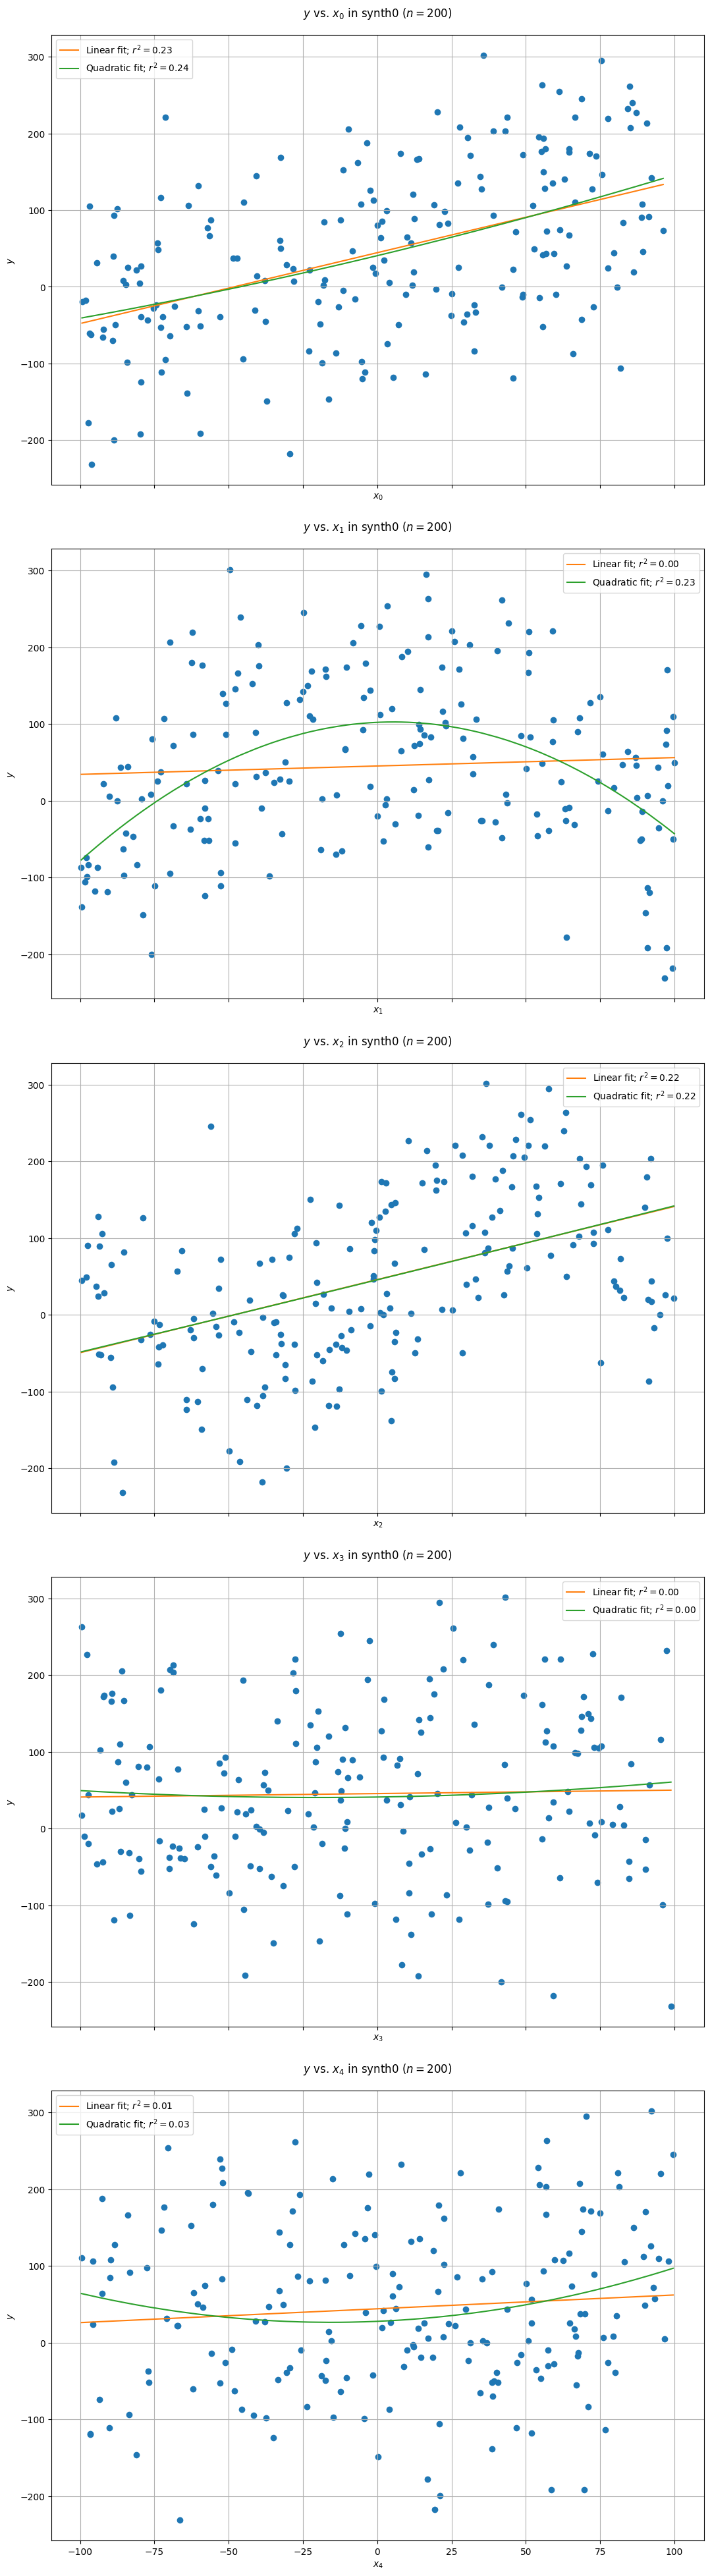

In [22]:
fig, axes = plt.subplots(len(X.columns), 1, sharex=True, sharey=True, figsize=(12, 8 * len(X.columns)))
fig.tight_layout(pad=6)

for ii, ax in enumerate(axes):
    col = f'x_{ii}'
    ax.scatter(X[col], y, c="C0")

    sx = X[col].sort_values()
    sy = y.sort_values()
    y_bar = sy.mean()

    ss = ((sy - y_bar) ** 2).sum()

    # Linear fit:
    m_linear, b_linear = np.polyfit(X[col], y, 1)

    y_linear = m_linear * sx + b_linear

    ss_reg_linear = ((y_linear - y_bar) ** 2).sum()
    
    r2_linear = ss_reg_linear / ss
    
    ax.plot(sx, y_linear, c="C1", label=f"Linear fit; $r^2 = {r2_linear:0.2f}$")

    # Quadratic fit:
    a_quadratic, b_quadatic, c_quadratic = np.polyfit(X[col], y, 2)

    y_quadratic = a_quadratic * sx * sx + b_quadatic * sx + c_quadratic

    ss_reg_quadratic = ((y_quadratic - y_bar) ** 2).sum()
    
    r2_quadratic = ss_reg_quadratic / ss
    
    ax.plot(sx, y_quadratic, c="C2", label=f"Quadratic fit; $r^2 = {r2_quadratic:0.2f}$")
    
    ax.legend()
    ax.set_title(f"$y$ vs. ${col}$ in synth0 ($n = {N}$)", pad=20) 
    ax.set_xlabel(f"${col}$")
    ax.set_ylabel('$y$')
    
    ax.grid()

In [7]:
impact_model = XGBoostImpactModel(
    random_state=0x61E77BE9,
)

In [8]:
impact_model.fit(X, y)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


{'x_0': (<Figure size 1200x800 with 1 Axes>,
  <Axes: title={'center': 'Impact of x_0'}, xlabel='x_0', ylabel='Impact'>),
 'x_1': (<Figure size 1200x800 with 1 Axes>,
  <Axes: title={'center': 'Impact of x_1'}, xlabel='x_1', ylabel='Impact'>),
 'x_2': (<Figure size 1200x800 with 1 Axes>,
  <Axes: title={'center': 'Impact of x_2'}, xlabel='x_2', ylabel='Impact'>),
 'x_3': (<Figure size 1200x800 with 1 Axes>,
  <Axes: title={'center': 'Impact of x_3'}, xlabel='x_3', ylabel='Impact'>),
 'x_4': (<Figure size 1200x800 with 1 Axes>,
  <Axes: title={'center': 'Impact of x_4'}, xlabel='x_4', ylabel='Impact'>)}

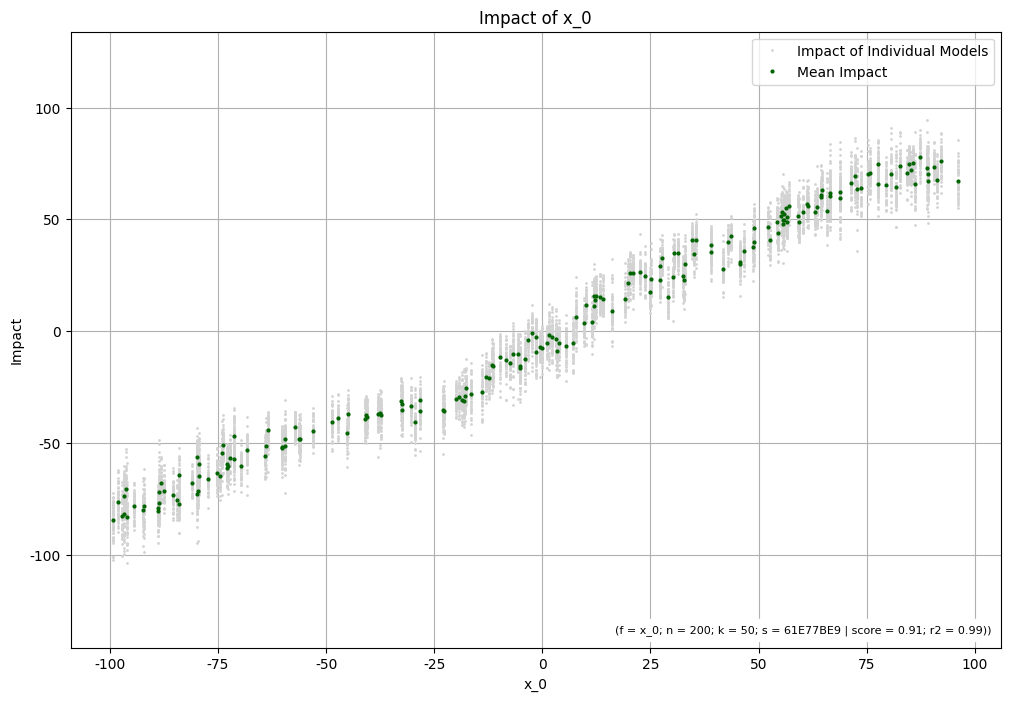

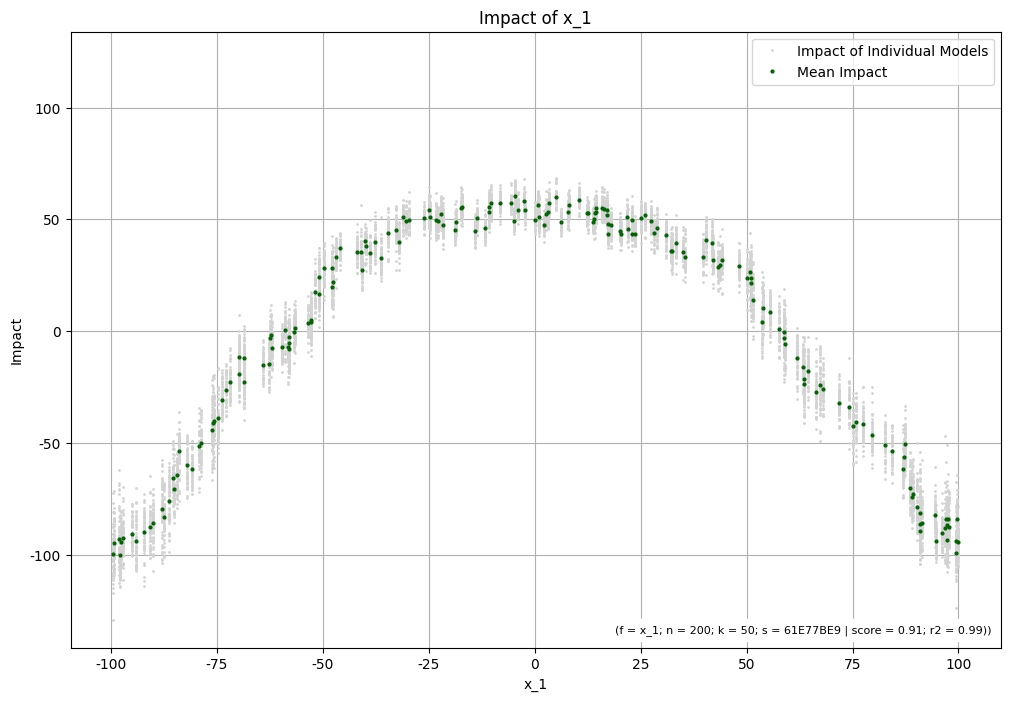

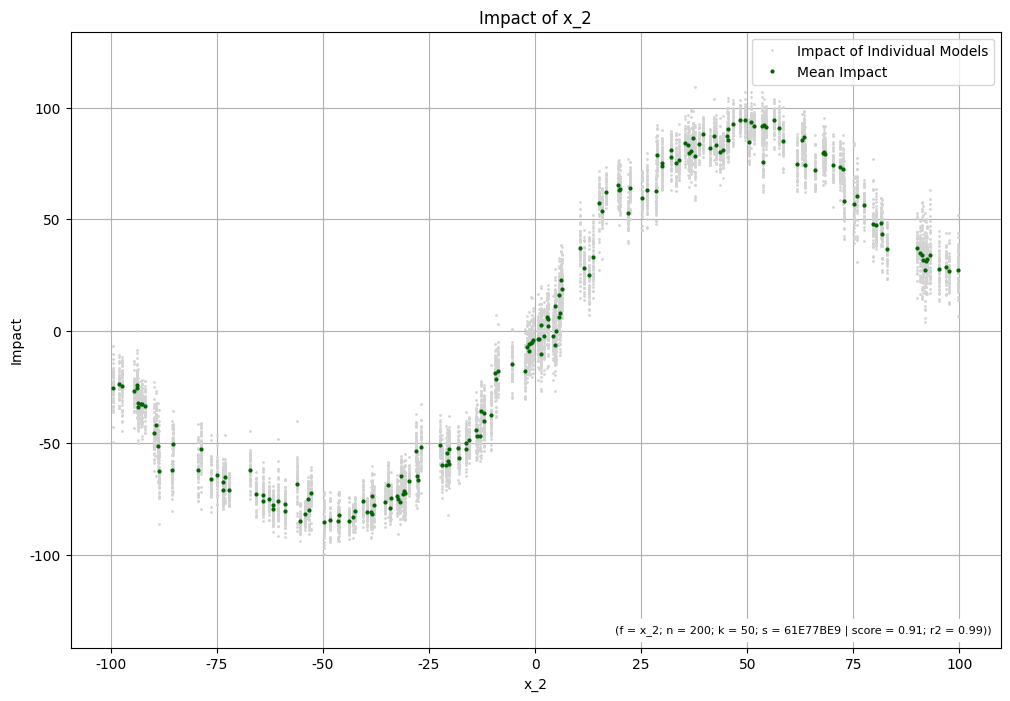

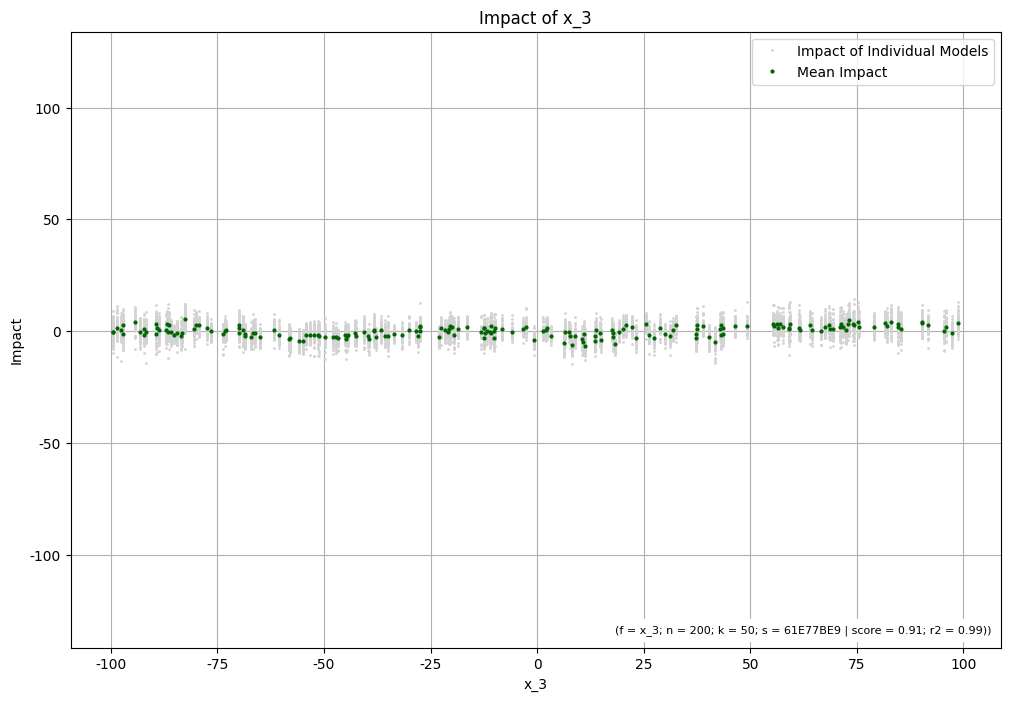

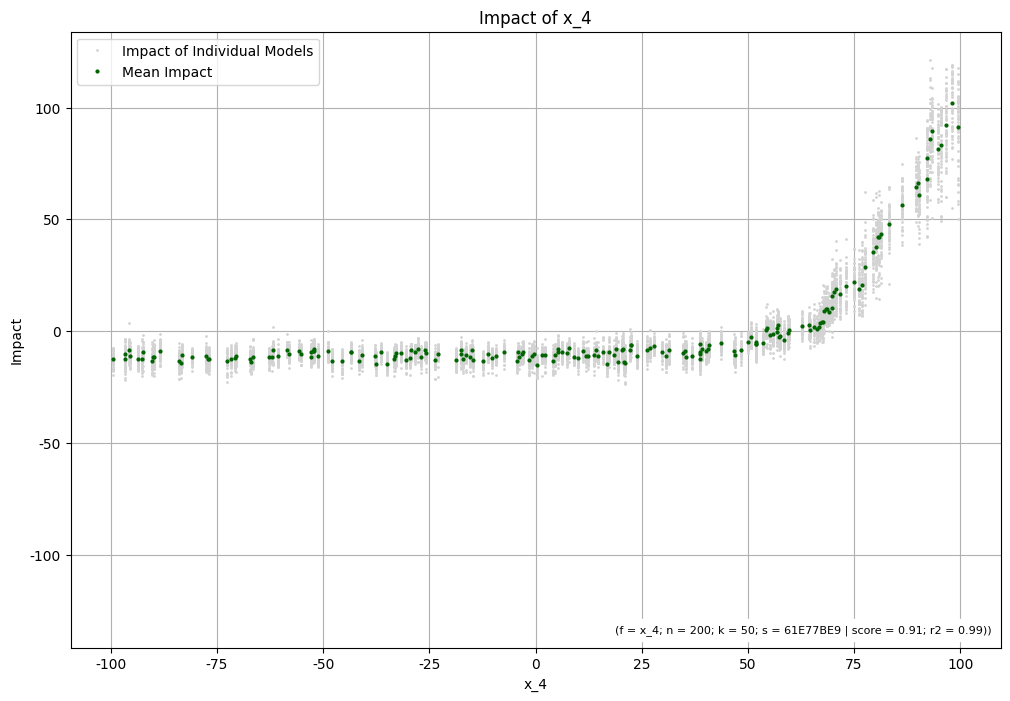

In [12]:
impact_model.impact_charts(X, X.columns, subplots_kwargs=dict(figsize=(12, 8)))

In [10]:
from math import exp

In [11]:
exp(-2)

0.1353352832366127